11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training with Adam optimizer


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.8734 - loss: 0.4389 - val_accuracy: 0.9576 - val_loss: 0.1410
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9661 - loss: 0.1188 - val_accuracy: 0.9695 - val_loss: 0.0997
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9761 - loss: 0.0779 - val_accuracy: 0.9751 - val_loss: 0.0841
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9837 - loss: 0.0562 - val_accuracy: 0.9763 - val_loss: 0.0802
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9864 - loss: 0.0432 - val_accuracy: 0.9728 - val_loss: 0.0922
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9893 - loss: 0.0346 - val_accuracy: 0.9753 - val_loss: 0.0809
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9922 - loss: 0.0248 - val_accuracy: 0.9772 - val_loss: 0.0808
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9934 - loss: 0.0215 

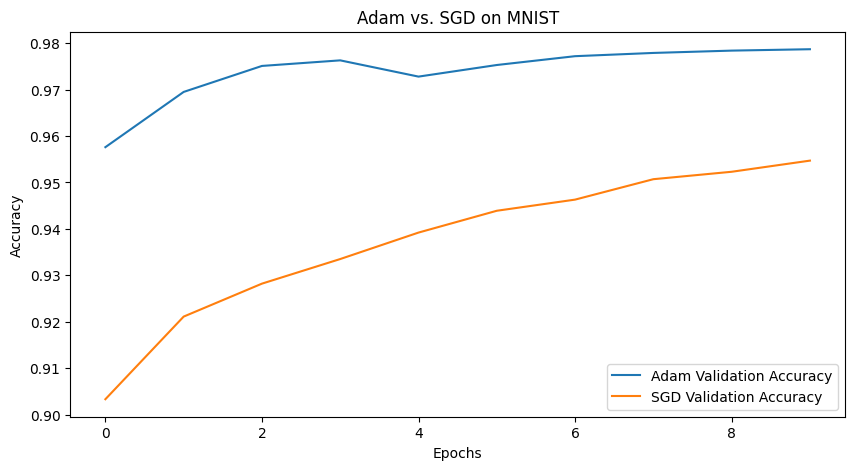

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Load MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize data
x_train, x_test = x_train / 255.0, x_test / 255.0

# Define a simple model
def create_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    return model

# Train models with Adam and SGD
optimizers = {'Adam': tf.keras.optimizers.Adam(), 'SGD': tf.keras.optimizers.SGD()}
history = {}

for opt_name, optimizer in optimizers.items():
    print(f"Training with {opt_name} optimizer")
    model = create_model()
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    history[opt_name] = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, verbose=1)

# Plot accuracy comparison
plt.figure(figsize=(10, 5))
for opt_name in optimizers.keys():
    plt.plot(history[opt_name].history['val_accuracy'], label=f'{opt_name} Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Adam vs. SGD on MNIST')
plt.legend()
plt.show()
